In [1]:
'''

截取所有条件的epoch，然后进行清洗。

所有epoch ，然后再来考虑 evoked


ASSR 实验

4hz 4
6Hz 6
'''

'''

这里和之前3个预实验有点不一样

有两套ASSR实验 共用了同样的mark 所以你需要切割一下.

'''



'\n\n这里和之前3个预实验有点不一样\n\n有两套ASSR实验 共用了同样的mark 所以你需要切割一下.\n\n'

In [3]:
import mne
import os.path as op
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from autoreject import AutoReject


In [5]:
'''

{'4': 4, '30': 30}

4持续时间为20s jitter
30持续时间为10s
'''
sub_ids = [
            'pre4029_y'
          ]

#for sub_id,i in zip(sub_ids,range(len(sub_ids))):
    #读入之前处理好的reconst_raw

sub_id = sub_ids[0]
i = 0
save_path_ica = '.\data\\4raw_ica\\'
reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + 'ASSR.fif')


Opening raw data file .\data\4raw_ica\pre4029_yASSR.fif...
    Range : 3830016 ... 4557370 =   3830.016 ...  4557.370 secs
Ready.


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_15736\2469574602.py:18: RuntimeWarning: This filename (.\data\4raw_ica\pre4029_yASSR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + 'ASSR.fif')


In [4]:
""'''
进行切割

这是因为把两种marker打成一样了.
'''
%matplotlib qt
reconst_raw.plot()

Using qt as 2D backend.


In [ ]:
#确定切割范围
# reconst_raw.crop(tmin=1324,tmax=3182)
# reconst_raw.plot()

In [8]:
# 列出所有条件 对应的 mark数字。
# 只要ASSR的

'''

4 30的时长不一样，一次处理一个
 4的长度是6,
 30的长度是10

'''
target_events_ASSR = {
                        '4':4,
                        '30':30,

                     }
target_events_ASSR = {
                        '4':4,

}
# 设置好epoch的时长
tmax = 31
tmin = -0.5
#先找events，epoch和average都是一步的事情。
custom_mapping = target_events_ASSR
(events_from_annot,
 event_dict) = mne.events_from_annotations(reconst_raw, event_id=custom_mapping)
#还不如直接对 events_from_annot 进行切片
#先遍历，把合适的单词筛序出来
#对应的vocabulary已经列出，然后怎么提取呢？
events_ASSR = events_from_annot
count_remembered_events = len(events_ASSR)
#
'''
4对应11s,
30对应6s,
'''

epochs_ASSR = mne.Epochs(reconst_raw, events_ASSR, baseline =(-0.5,0),tmin=tmin, tmax=tmax, event_id=None,
                    preload=True, event_repeated='merge', reject_by_annotation=False)

#查看所有mark dict
#events_1 = mne.events_from_annotations(reconst_raw)

Used Annotations descriptions: ['4']
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 31501 original time points ...
0 bad epochs dropped


In [9]:
'''
4Hz进行autoreject
'''
save_path_epoch = '.\data\\5epoch_ASSR\\'
epochs_ASSR.save(save_path_epoch + sub_id + '4-epo.fif', overwrite=True)
    #用autoreject处理一下
n_interpolates = np.array([1, 4, 32])
consensus_percs = np.linspace(0, 0.8, 11)
picks = mne.pick_types(epochs_ASSR.info, meg=False, eeg=True, stim=False, eog=False,
                       include=[], exclude=[])
ar_ASSR = AutoReject(n_interpolates,consensus_percs,picks=picks,
                thresh_method='random_search',random_state=23)
ar_ASSR.fit(epochs_ASSR)
epochs_clean_ASSR = ar_ASSR.transform(epochs_ASSR)


Overwriting existing file.
Running autoreject on ch_type=eeg


D:\ProgramData\anaconda\lib\site-packages\autoreject\utils.py:65: UserWarning: 1 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/10 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/10 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/10 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/10 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.56 and n_interpolate=32


D:\ProgramData\anaconda\lib\site-packages\autoreject\utils.py:65: UserWarning: 1 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(


  0%|          | Repairing epochs : 0/10 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


In [10]:

'''
把 30 4 的epoch长度不一样,需要分别做.
'''
epochs_clean_ASSR_4Hz = epochs_clean_ASSR['4']
# epochs_clean_ASSR_30Hz = epochs_clean_ASSR['6']
#

evoked_original_ASSR_4Hz = list()
evoked_clean_ASSR_4Hz = list()
evoked_original_ASSR_30Hz = list()
evoked_clean_ASSR_30Hz = list()




In [11]:
#先average看下结果，对比
#如果结果不错就可以分别保存下来。
evoked_original_ASSR_4Hz.append(epochs_ASSR['4'].average())#没有autoreject的
evoked_clean_ASSR_4Hz.append(epochs_clean_ASSR_4Hz.average())

save_path_epoch_clean = '.\data\\6epoch_clean_ASSR\\'
epochs_clean_ASSR_4Hz.save(save_path_epoch_clean + sub_id + '_4Hz_-epo.fif', overwrite=True)
# save_path_evoked = '.\data\\7evoked_ASSR\\'
#为什么这里加i?因为是list，epochs不是list
# evoked_clean_ASSR_4Hz[i].save(save_path_evoked + sub_id + '_30hz-ave.fif',overwrite=True)

# # 30Hz
#
# evoked_original_ASSR_30Hz.append(epochs_ASSR['6'].average())#没有autoreject的
# evoked_clean_ASSR_30Hz.append(epochs_clean_ASSR_30Hz.average())
#
# save_path_epoch_clean = '.\data\\6epoch_clean_ASSR\\'
# epochs_clean_ASSR_30Hz.save(save_path_epoch_clean + sub_id + '_6hz-epo.fif', overwrite=True)
# save_path_evoked = '.\data\\7evoked_ASSR\\'
# #为什么这里加i?因为是list，epochs不是list
# evoked_clean_ASSR_30Hz[i].save(save_path_evoked + sub_id + '_6hz-ave.fif',overwrite=True)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [12]:
"""
画出evoked并不是为了保存,而是为了查看处理效果.

"""
%matplotlib qt
fig_original = evoked_original_ASSR_4Hz[i].plot(window_title = sub_id)
# fig_original.savefig(save_path_evoked+'_original_' + sub_id)
fig_clean = evoked_clean_ASSR_4Hz[i].plot(window_title = sub_id)
# fig_clean.savefig(save_path_evoked+'_clean_'+ sub_id)

# fig_original = evoked_original_ASSR_30Hz[i].plot(window_title = sub_id)
# fig_original.savefig(save_path_evoked+'_original_' + sub_id)
# fig_clean = evoked_clean_ASSR_30Hz[i].plot(window_title = sub_id)
# fig_clean.savefig(save_path_evoked+'_clean_'+ sub_id)

Opening epochs-browser...


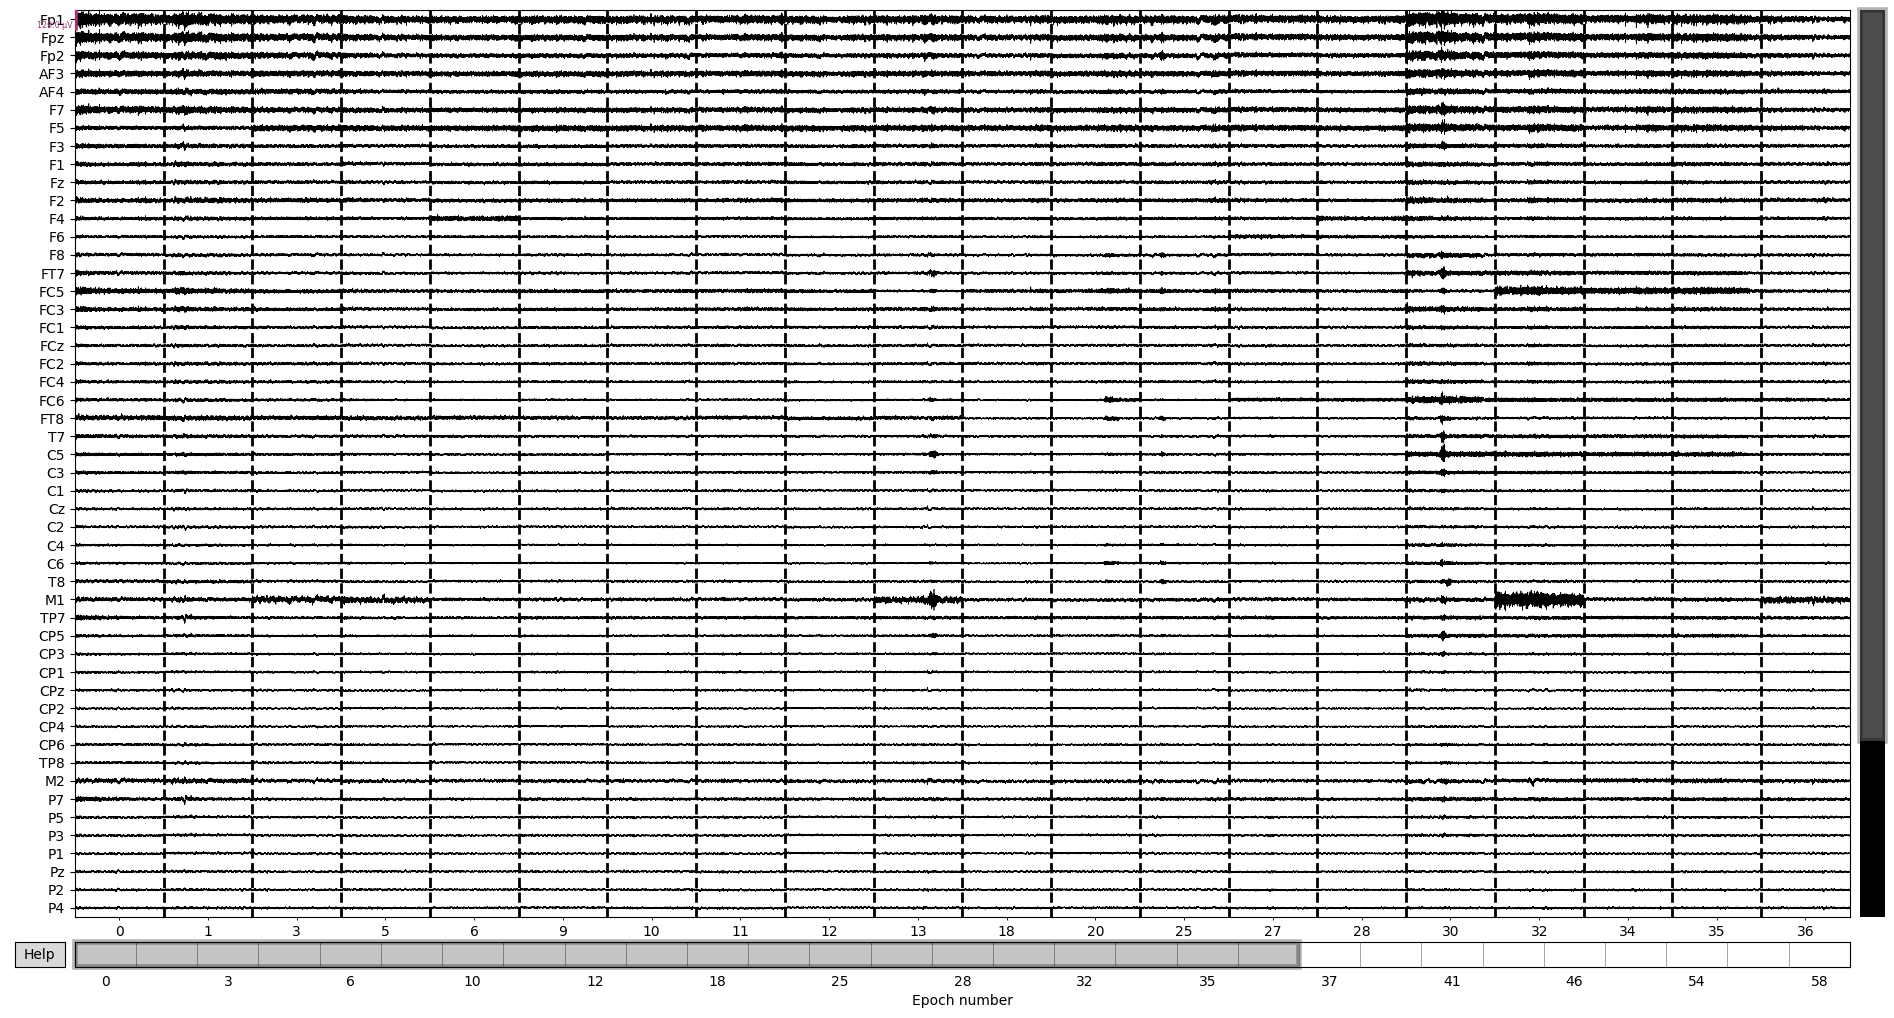

In [15]:
epochs_clean_ASSR_30Hz.plot(n_channels = 50, scalings=60e-6,
                 )